# House Prices: Advanced Regression Techniques
+ https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
+ 작성일: 2018-06-20 ~

# 1. Data Load

In [1]:
import pandas as pd 
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Explore Data Analysis

## 2.1 데이터 확인

In [2]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
# 통계량 확인
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
# 결측치 많은 변수 제거 
na_feature_list = ['Alley', 'FireplaceQu', 'PoolQC','Fence', 'MiscFeature']    
columns_list = list(df.columns)

for na_feature in na_feature_list:
    columns_list.remove(na_feature)

df = df[columns_list]

In [5]:
# 카테고리 변수, 수치형 변수 리스트 
category_feature_list = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                         'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                         'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                         'PavedDrive', 'SaleType', 'SaleCondition']

numeric_feature_list = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
                        'YrSold']

In [6]:
# 결측치 보간 
from sklearn.preprocessing import Imputer
imputer = Imputer()
imputer.fit(df[numeric_feature_list])
df[numeric_feature_list] = pd.DataFrame(imputer.transform(df[numeric_feature_list]))

In [7]:
# 결측치 제거 
df = df.dropna()

## 타겟 변수 분포 확인

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


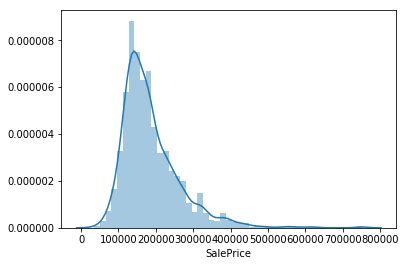

In [8]:
# 타겟 변수 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df['SalePrice'])
plt.show()

### Category Column: SalePrice EDA

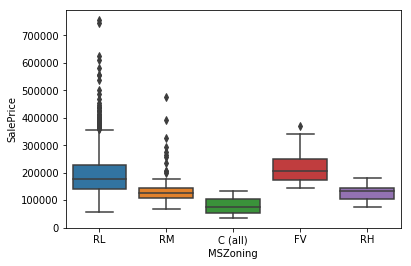

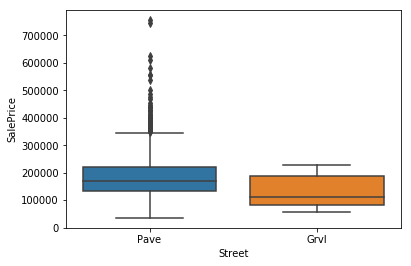

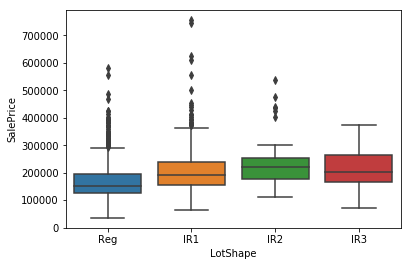

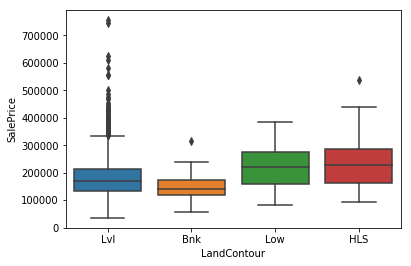

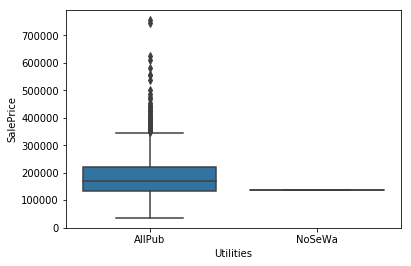

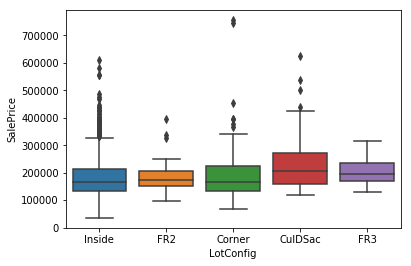

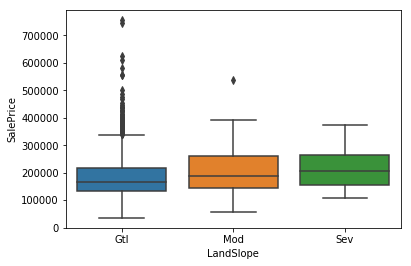

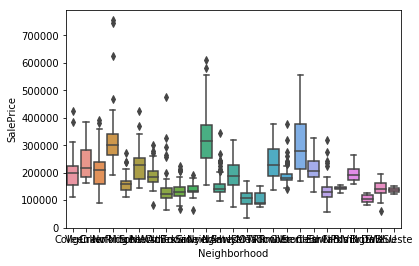

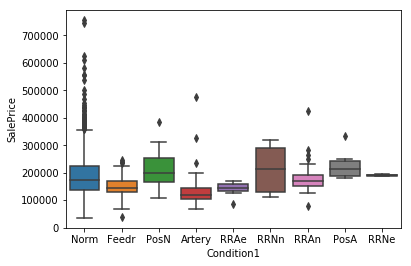

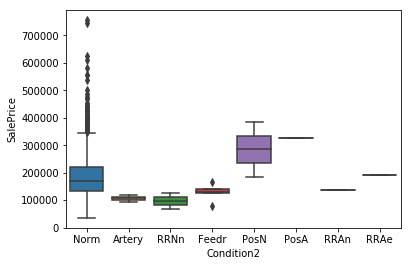

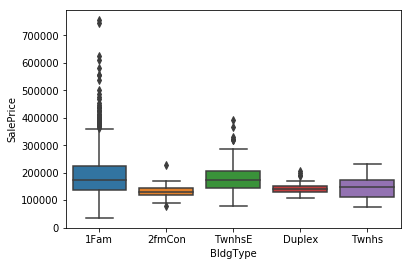

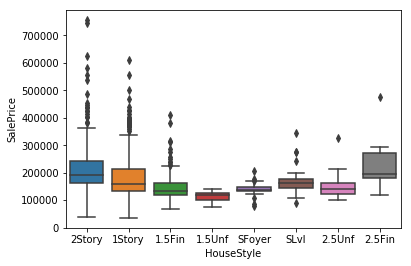

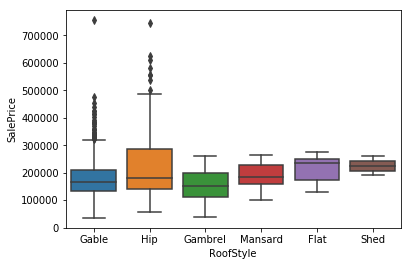

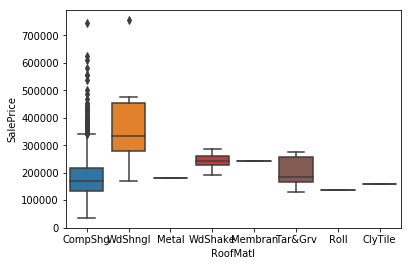

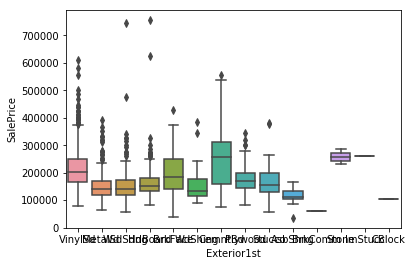

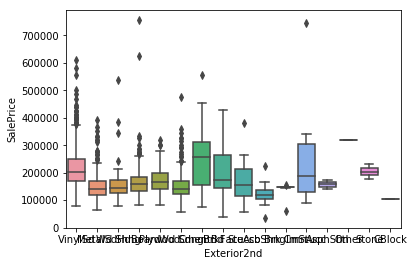

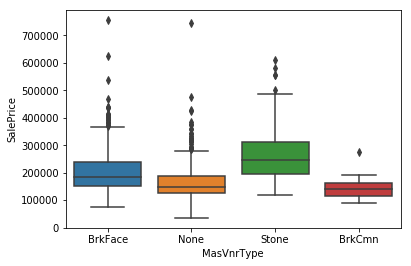

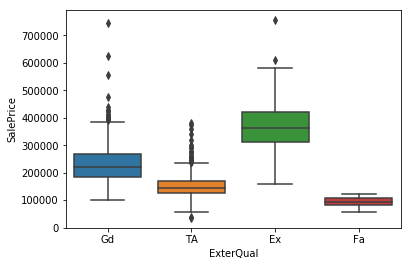

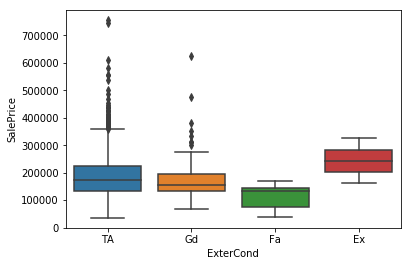

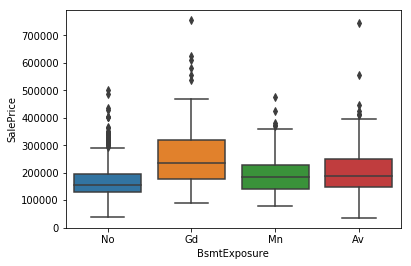

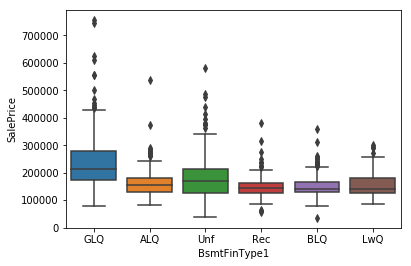

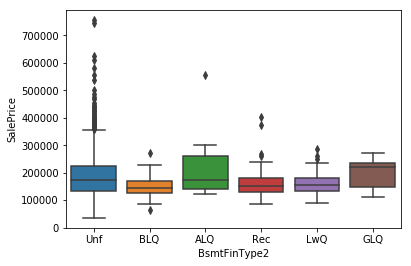

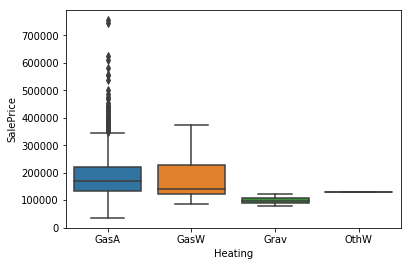

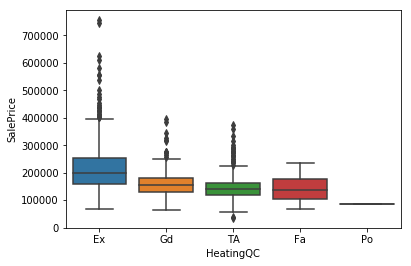

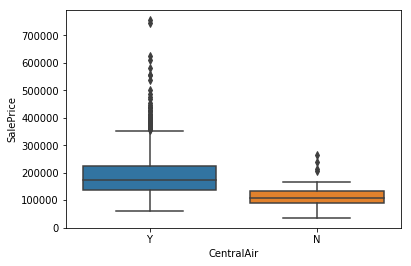

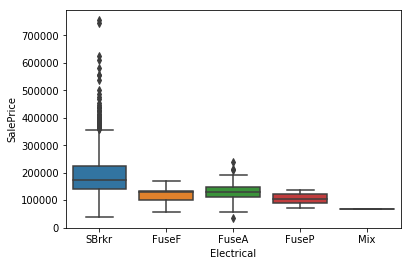

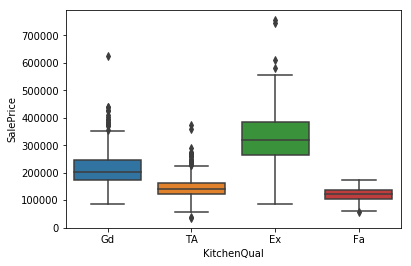

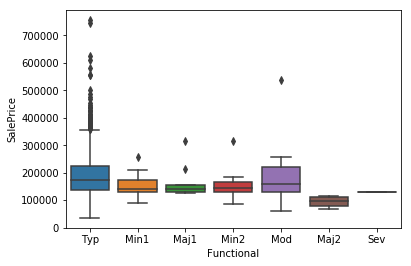

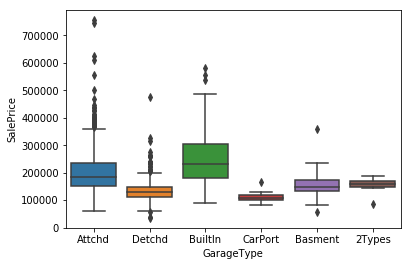

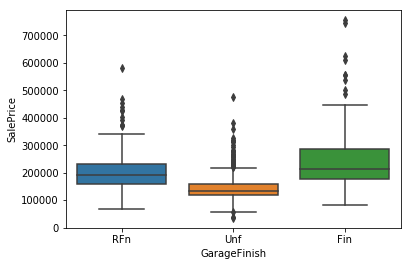

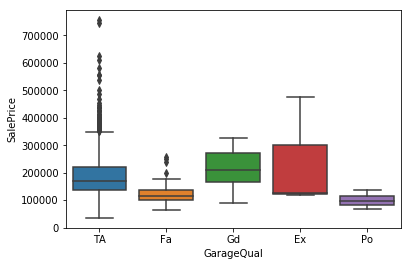

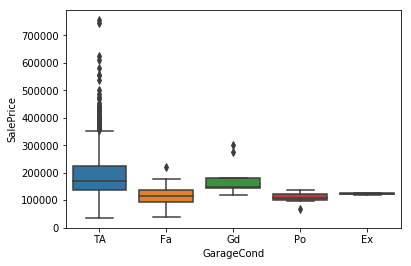

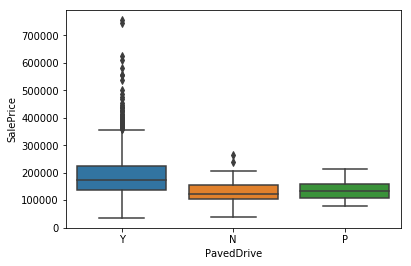

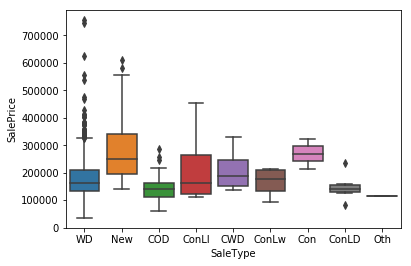

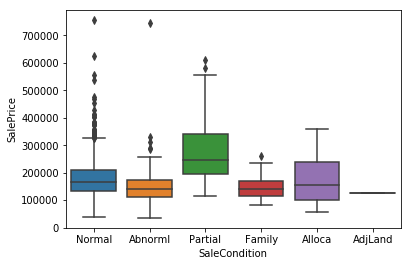

In [9]:
import seaborn as sns
for i in range(len(category_feature_list)):
    ax = sns.boxplot(x=category_feature_list[i], y="SalePrice", data=df)
    plt.show()

### Numeric Column: SalesPrice EDA

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

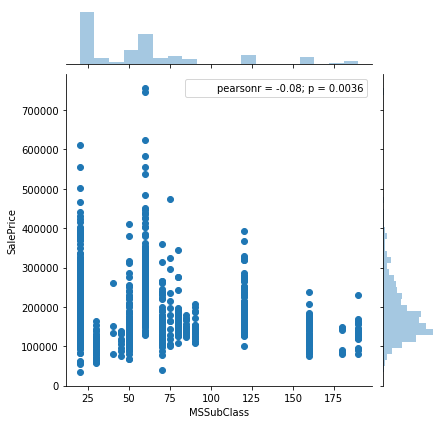

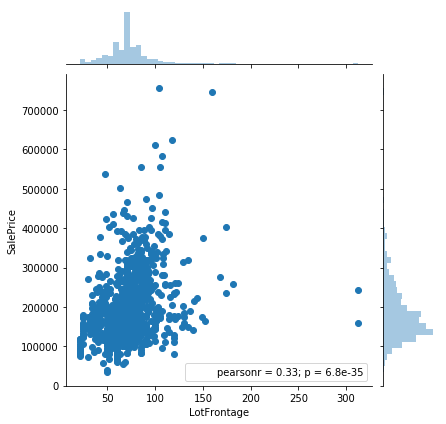

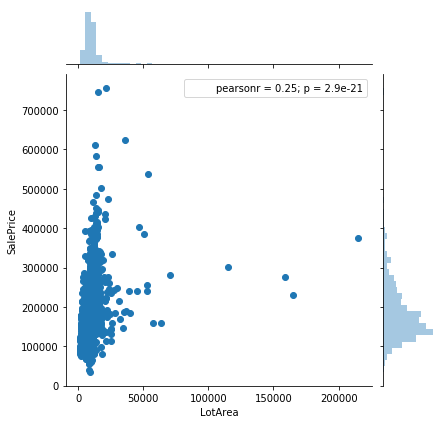

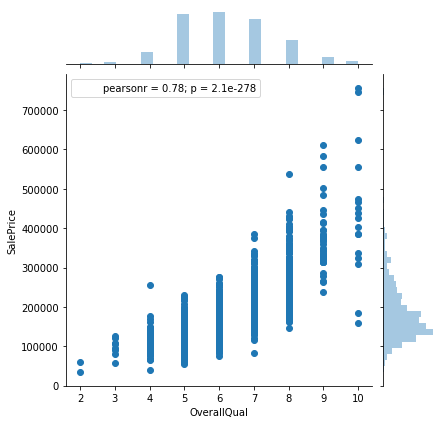

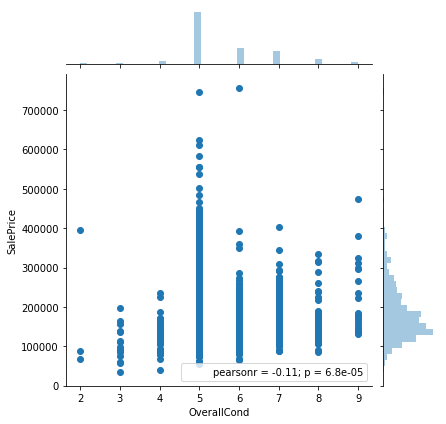

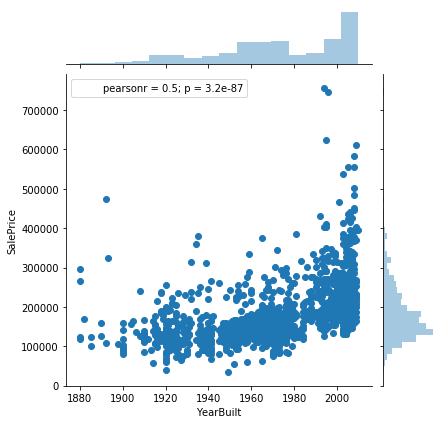

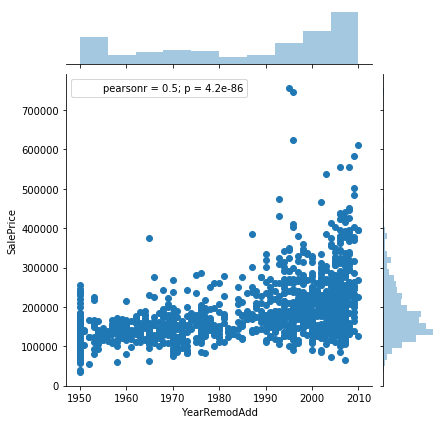

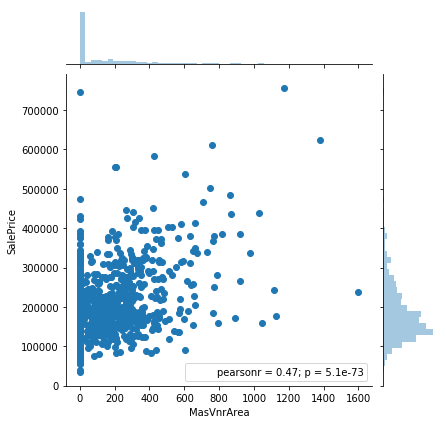

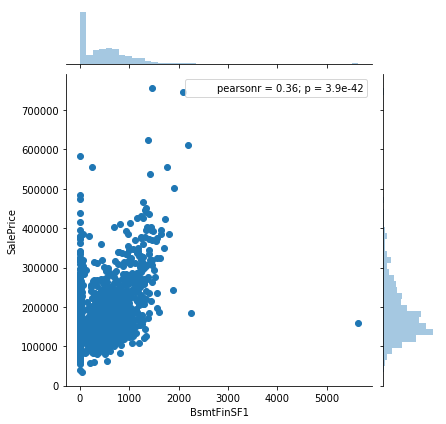

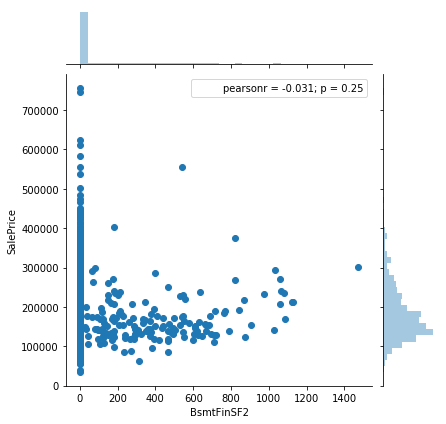

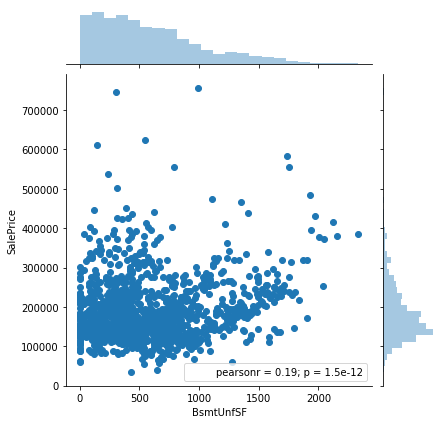

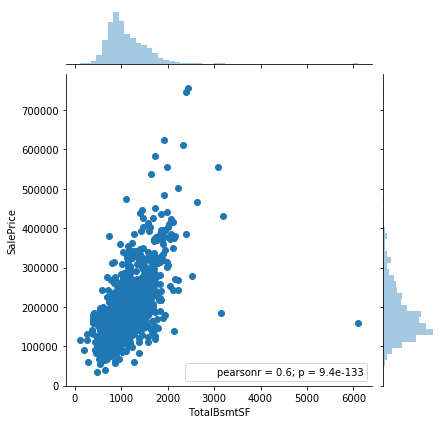

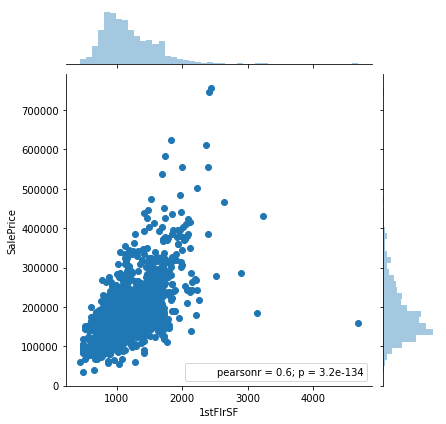

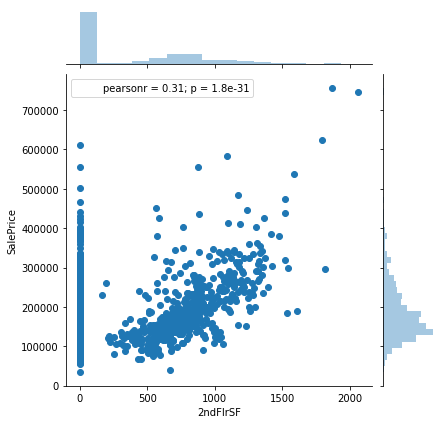

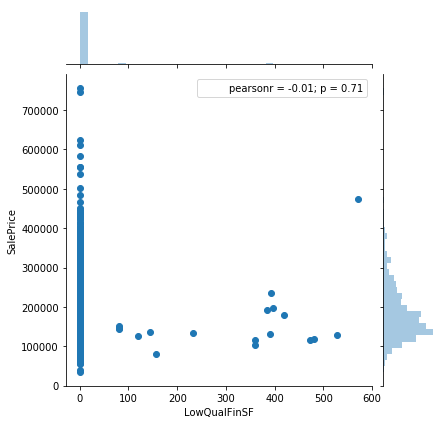

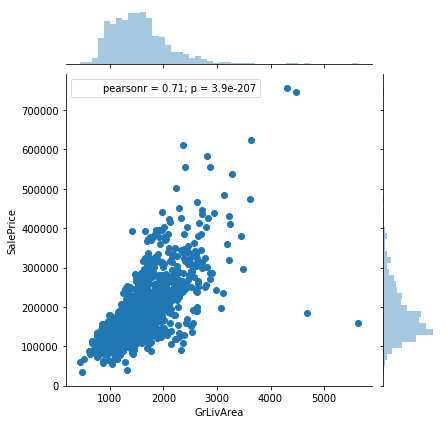

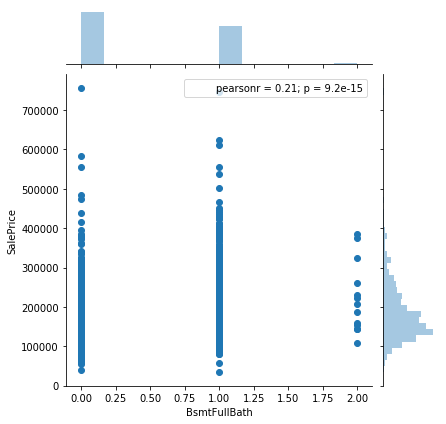

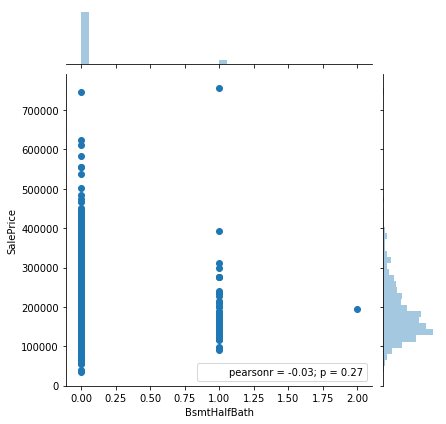

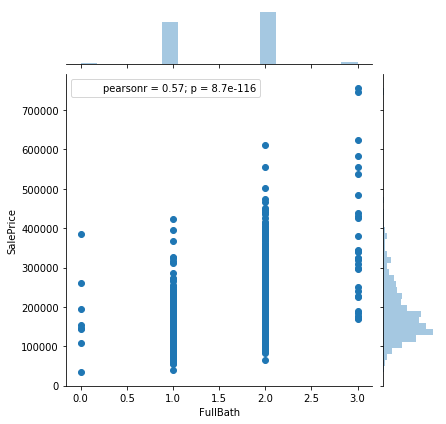

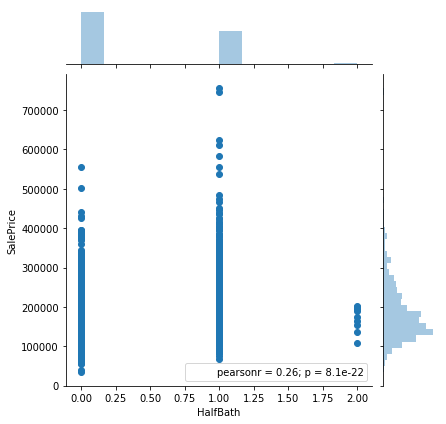

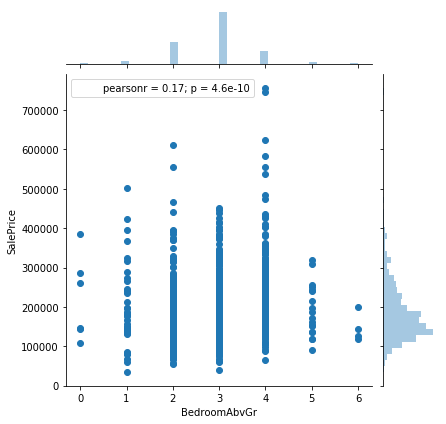

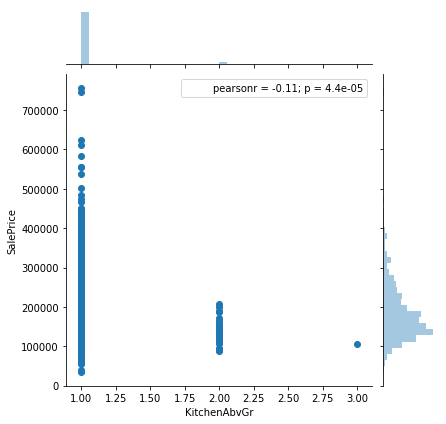

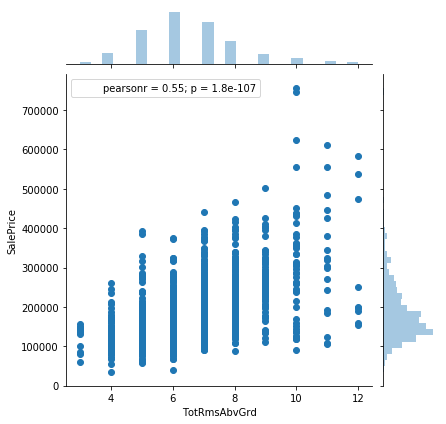

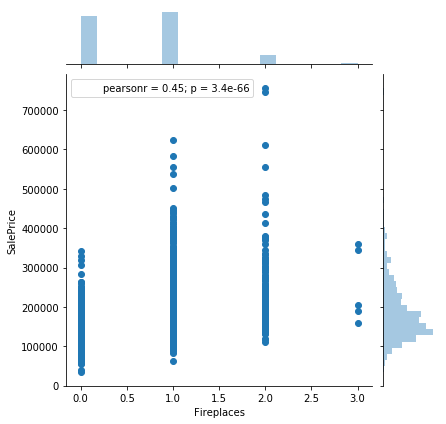

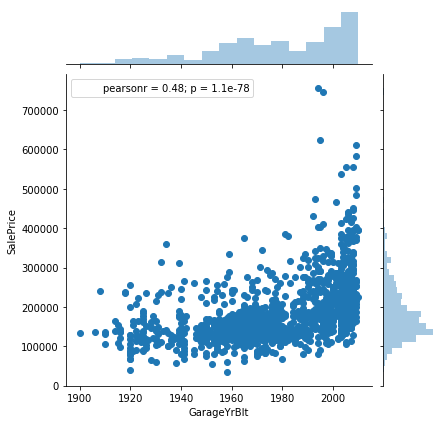

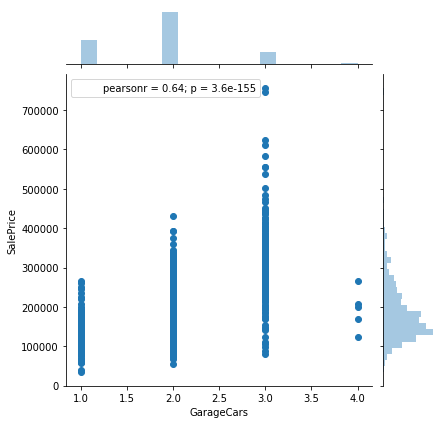

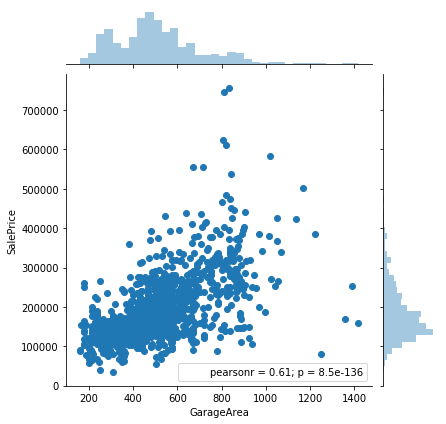

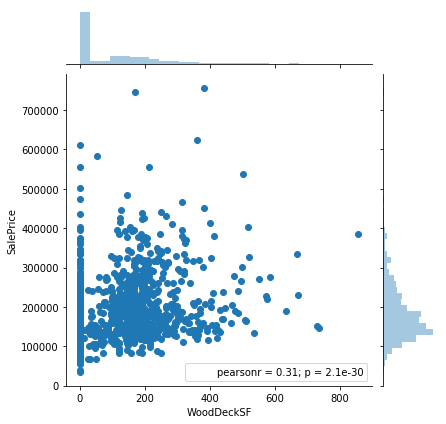

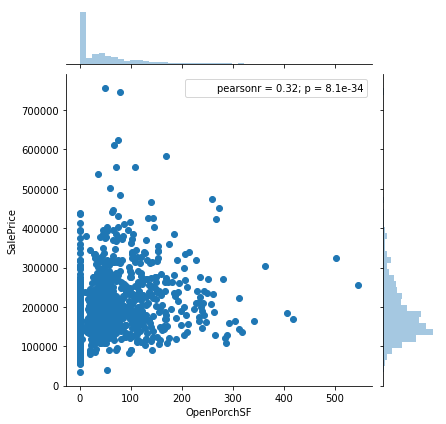

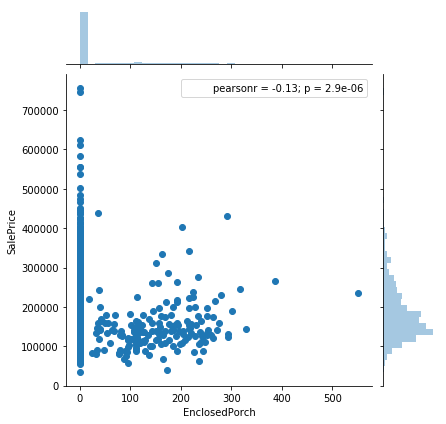

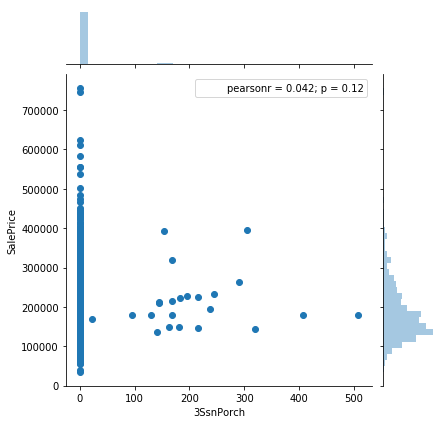

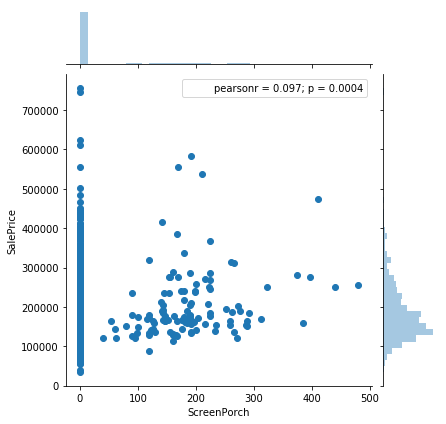

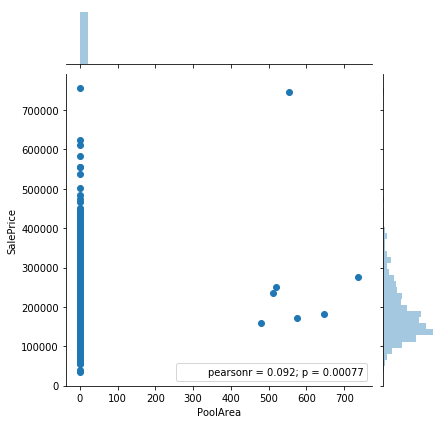

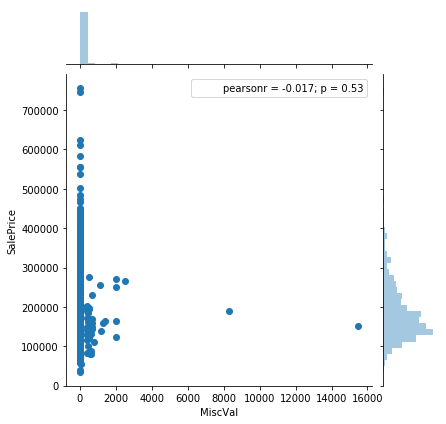

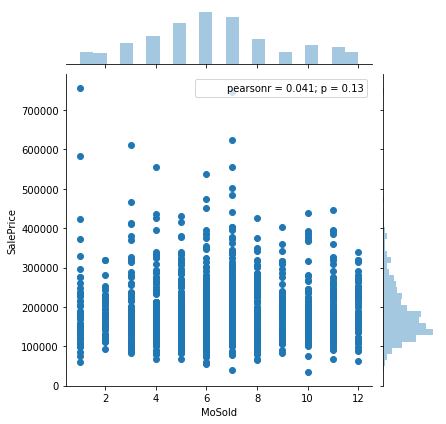

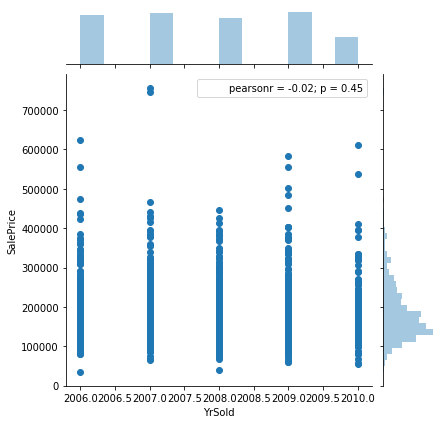

In [10]:
plt.clf()
for i in range(len(numeric_feature_list)):
    g = sns.jointplot(x=numeric_feature_list[i], y="SalePrice", data=df)
    plt.show()

### Outlier 제거

In [11]:
df.sort_values(by = 'LotFrontage', ascending=False)
df.drop(df[df['Id'] == 1299].index, inplace=True)
df.drop(df[df['Id'] == 935].index, inplace=True)

In [12]:
## target value 최고 최저 10개 제거 
df.drop(df.sort_values(by = 'SalePrice', ascending=False)['SalePrice'][:10].index, inplace=True)
df.drop(df.sort_values(by = 'SalePrice', ascending=False)['SalePrice'][-10:].index, inplace=True)

# 3. Data Preprocessing

### 카테고리 변수, 수치형 변수 데이터 구분 

### 카테고리 데이터 전처리: 레이블 인코딩 -> 원핫 인코딩

In [13]:
# 카테고리 데이터 전처리 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
# 카테고리 데이터 전처리 함수 정의 
def get_label_encoded_data(category_name, df):
    """
    input: category_name(카테고리명), df(데이터)
    output: label_encoded(label 인코딩된 카테고리 데이터)
    desc: label encoding 수행 
    """
    le = preprocessing.LabelEncoder()
    data = df[category_name]
    le.fit(data)
    label_encoded = le.transform(data)
    label_encoded = label_encoded.reshape(len(label_encoded), 1)
    return label_encoded

In [14]:
import numpy as np
def get_one_hot_encoded_data(category_feature_list, df):
    """
    input: category_feature_list(카테고리 변수 리스트), df(데이터)
    output: one_hot_encoded(원-핫 인코딩 된 데이터)
    desc: label 인코딩 된 데이터들을 받아서 one_hot 인코딩 수행 
    """
    _category_data = []
    for category_name in category_feature_list:
        data = get_label_encoded_data(category_name, df)
        enc = OneHotEncoder()
        enc.fit(data)
        _one_hot_encoded = enc.transform(data).toarray()
        _category_data.append(_one_hot_encoded)
    one_hot_encoded = np.hstack(_category_data)
    return one_hot_encoded


# 카테고리 데이터 전처리 
category_data = get_one_hot_encoded_data(category_feature_list, df)
category_data.shape

(1316, 213)

### 수치형 데이터 전처리: Min-Max Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 전처리 
def get_numeric_preprocessed_data(numeric_feature_list, df):
    """
    input: category_feature_list(카테고리 변수 리스트), df(데이터)
    output: numrric_preprocessed
    desc: 수치형 데이터들을 받아서 Min-max normalization 수행
    """
    data = df[numeric_feature_list]
    scaler = MinMaxScaler()
    scaler.fit(data)
    numeric_preprocessed = scaler.transform(data)
    
    return numeric_preprocessed

# 수치형 데이터 전처리 
numeric_data = get_numeric_preprocessed_data(numeric_feature_list, df)
numeric_data.shape

(1316, 36)

### 타겟 변수: SalePrice

In [16]:
# 타겟 변수: SalesPrice
target_data = df['SalePrice']
target_data = target_data.reshape(len(target_data), 1)
target_data.shape

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


(1316, 1)

### 데이터 합치기: 카테고리 데이터 + 수치형 데이터

In [17]:
# 데이터 합치기 : 카테고리 데이터 + 수치형 데이터 + 타겟 데이터 
total_data = np.hstack((category_data, numeric_data, target_data))
np.random.shuffle(total_data)
total_data.shape

(1316, 250)

# 4. Split Data: Train + Test

In [18]:
train_ratio = 0.8 
train = total_data[:int(len(total_data) * train_ratio)]
test = total_data[int(len(total_data) * train_ratio):]

X_train = train[:,:-1]
y_train = train[:,-1]

X_test = test[:,:-1]
y_test = test[:,-1]

In [19]:
X_train.shape

(1052, 249)

## Feature Selection

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)
X_train_new.shape

X_train = X_train_new
X_test = X_test_new

# 5. Modeling

In [21]:
# Utility function to report best scores
def report(results, n_top=15):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [22]:
from sklearn.metrics import mean_absolute_error
def performance_check(reg, X_train, y_train, X_test, y_test):
    # TRAINING PERFORMANCE
    #reg = grid_search.best_estimator_
    pred = reg.predict(X_train)
    train_err =mean_absolute_error(y_train, pred)
    print("Train ERROR: ", train_err)

    # TEST PERFORMANCE
    pred = reg.predict(X_test)
    test_err = mean_absolute_error(y_test, pred)
    print("TEST ERROR: ", mean_absolute_error(y_test, pred))
    
    return train_err,test_err 

## 5.1 Artificial Neural Network

In [23]:
X_train.shape

(1052, 18)

In [24]:
RANDOM_SEED=5

In [25]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
# build a classifier
reg = MLPRegressor(random_state=RANDOM_SEED)
# use a full grid over all parameters
param_grid={"hidden_layer_sizes": [(256, 128, 256), 
                                   (256, 128, 128, 256)],
            "alpha": np.logspace(5, 10 , 2)}

# run grid search
grid_search = GridSearchCV(reg, param_grid=param_grid, 
                           scoring ="neg_mean_absolute_error", cv=5)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

GridSearchCV took 62.14 seconds for 4 candidate parameter settings.
Model with rank: 1
Mean validation score: -21504.264 (std: 1546.218)
Parameters: {'hidden_layer_sizes': (256, 128, 256), 'alpha': 100000.0}

Model with rank: 2
Mean validation score: -34114.179 (std: 7479.766)
Parameters: {'hidden_layer_sizes': (256, 128, 128, 256), 'alpha': 100000.0}

Model with rank: 3
Mean validation score: -184036.733 (std: 2968.752)
Parameters: {'hidden_layer_sizes': (256, 128, 128, 256), 'alpha': 10000000000.0}

Model with rank: 4
Mean validation score: -184036.877 (std: 2968.754)
Parameters: {'hidden_layer_sizes': (256, 128, 256), 'alpha': 10000000000.0}



C:\Users\HSChoi\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
reg = grid_search.best_estimator_
ann_train_err, ann_test_err = performance_check(reg, X_train, y_train, X_test, y_test)

Train ERROR:  19852.12797920421
TEST ERROR:  22731.960042868996


## 5.2 Random Forest

In [27]:
print(__doc__)

import numpy as np
from sklearn.ensemble import RandomForestRegressor


# build a classifier
reg = RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=100)
# use a full grid over all parameters
param_grid={"max_depth": [4, 8, 16, 32, 64, 128],
            "max_features": ["auto", "sqrt", "log2"]}

# run grid search
grid_search = GridSearchCV(reg, param_grid=param_grid, 
                           scoring ="neg_mean_absolute_error", cv=5)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
GridSearchCV took 20.67 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: -17060.842 (std: 686.245)
Parameters: {'max_features': 'sqrt', 'max_depth': 32}

Model with rank: 1
Mean validation score: -17060.842 (std: 686.245)
Parameters: {'max_features': 'log2', 'max_depth': 32}

Model with rank: 1
Mean validation score: -17060.842 (std: 686.245)
Parameters: {'max_features': 'sqrt', 'max_depth': 64}

Model with rank: 1
Mean validation score: -17060.842 (std: 686.245)
Parameters: {'max_features': 'log2', 'max_depth': 64}

Model with rank: 1
Mean validation score: -17060.842 (std: 686.245)
Parameters: {'max_features': 'sqrt', 'max_depth': 128}

Model with rank: 1
Mean validation score: -17060.842 (std: 686.245)
Parameters: {'max_features': 'log2', 'max_depth': 128}

Model with rank: 7
Mean validation score: -17162.654 (std: 867.762)
Parameters: {'max_features': 'sqrt', 'max_depth': 16}

Mod

In [28]:
grid_search.cv_results_
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
means, stds
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print(grid_search.best_params_)

-21288.841 (+/-1964.192) for {'max_features': 'auto', 'max_depth': 4}
-20453.359 (+/-2209.087) for {'max_features': 'sqrt', 'max_depth': 4}
-20453.359 (+/-2209.087) for {'max_features': 'log2', 'max_depth': 4}
-17933.658 (+/-1722.347) for {'max_features': 'auto', 'max_depth': 8}
-17453.947 (+/-1479.696) for {'max_features': 'sqrt', 'max_depth': 8}
-17453.947 (+/-1479.696) for {'max_features': 'log2', 'max_depth': 8}
-17675.641 (+/-1686.920) for {'max_features': 'auto', 'max_depth': 16}
-17162.654 (+/-1735.523) for {'max_features': 'sqrt', 'max_depth': 16}
-17162.654 (+/-1735.523) for {'max_features': 'log2', 'max_depth': 16}
-17678.220 (+/-1760.742) for {'max_features': 'auto', 'max_depth': 32}
-17060.842 (+/-1372.491) for {'max_features': 'sqrt', 'max_depth': 32}
-17060.842 (+/-1372.491) for {'max_features': 'log2', 'max_depth': 32}
-17678.220 (+/-1760.742) for {'max_features': 'auto', 'max_depth': 64}
-17060.842 (+/-1372.491) for {'max_features': 'sqrt', 'max_depth': 64}
-17060.842 (

In [29]:
reg = grid_search.best_estimator_
rf_train_err, rf_test_err = performance_check(reg, X_train, y_train, X_test, y_test)

Train ERROR:  6203.658326996198
TEST ERROR:  19706.560063131314


## 5.3 Support Vector Regression

In [30]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# build a classifier
reg = SVR()
# use a full grid over all parameters

"""
param_grid=[
   {"kernel": ['rbf'],
            "C": [1e2, 1e3, 1e4, 1e5],
            "gamma": np.logspace(-2, 2, 5)}, 
    {"kernel": ['linear'],
            "C": [1e2, 1e3, 1e4, 1e5],} 
]
"""

# C increase, complexity increase
# gamma decrease, complexity increase
param_grid=[
{"kernel": ['rbf'],
            "C": [1e2],
            "gamma": np.logspace(-2, 2, 5)}   
]


# run grid search	metrics.accuracy_score
grid_search = GridSearchCV(reg, param_grid=param_grid, 
                           scoring ="neg_mean_absolute_error", cv=5)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
GridSearchCV took 1.28 seconds for 5 candidate parameter settings.
Model with rank: 1
Mean validation score: -44790.523 (std: 1992.848)
Parameters: {'gamma': 1.0, 'kernel': 'rbf', 'C': 100.0}

Model with rank: 2
Mean validation score: -47309.833 (std: 2049.439)
Parameters: {'gamma': 0.1, 'kernel': 'rbf', 'C': 100.0}

Model with rank: 3
Mean validation score: -49755.361 (std: 2114.886)
Parameters: {'gamma': 10.0, 'kernel': 'rbf', 'C': 100.0}

Model with rank: 4
Mean validation score: -50006.903 (std: 2114.328)
Parameters: {'gamma': 0.01, 'kernel': 'rbf', 'C': 100.0}

Model with rank: 5
Mean validation score: -50376.077 (std: 2114.342)
Parameters: {'gamma': 100.0, 'kernel': 'rbf', 'C': 100.0}



In [31]:
reg = grid_search.best_estimator_
svr_train_err, svr_test_err = performance_check(reg, X_train, y_train, X_test, y_test)

Train ERROR:  43675.586811152454
TEST ERROR:  50371.70353579833


## 5.4 Decision Tree Regressor

In [32]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# build a classifier
reg = DecisionTreeRegressor(random_state=RANDOM_SEED)
# use a full grid over all parameters
param_grid={"max_depth": [4, 8, 16, 32, 64, 128],
            "max_features": ["auto", "sqrt", "log2"]}

# run grid search
grid_search = GridSearchCV(reg, param_grid=param_grid, 
                           scoring ="neg_mean_absolute_error", cv=5)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


param_grid=[
   {"kernel": ['rbf'],
            "C": [1e2, 1e3, 1e4, 1e5],
            "gamma": np.logspace(-2, 2, 5)}, 
    {"kernel": ['linear'],
            "C": [1e2, 1e3, 1e4, 1e5],} 
]

GridSearchCV took 0.30 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: -23907.900 (std: 1207.314)
Parameters: {'max_features': 'sqrt', 'max_depth': 8}

Model with rank: 1
Mean validation score: -23907.900 (std: 1207.314)
Parameters: {'max_features': 'log2', 'max_depth': 8}

Model with rank: 3
Mean validation score: -24113.646 (std: 1378.257)
Parameters: {'max_features': 'auto', 'max_depth': 8}

Model with rank: 4
Mean validation score: -24691.797 (std: 1234.086)
Parameters: {'max_features': 'auto', 'max_depth': 16}

Model with rank: 5
Mean validation score: -25121.757 (std: 1477.017)
Parameters: {'max_features': 'auto', 'max_depth': 32}

Model with rank: 5
Mean validation score: -25121.757 (std: 1477.017)
Parameters: {'max_features': 'auto', 'max_depth': 64}

In [33]:
reg = grid_search.best_estimator_
dt_train_err, dt_test_err = performance_check(reg, X_train, y_train, X_test, y_test)

Train ERROR:  10690.77218563626
TEST ERROR:  28541.520246332075


## 6. Model Selection

[19852.12797920421, 6203.658326996198, 43675.586811152454, 10690.77218563626]


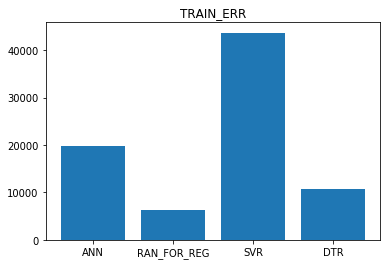

[19852.12797920421, 6203.658326996198, 43675.586811152454, 10690.77218563626]


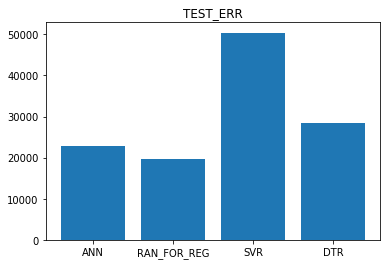

[22731.960042868996, 19706.560063131314, 50371.70353579833, 28541.520246332075]


In [34]:
list_reg = ['ANN', "RAN_FOR_REG", "SVR", "DTR"]
list_train_err = [ann_train_err, rf_train_err, svr_train_err, dt_train_err]
list_test_err = [ann_test_err, rf_test_err, svr_test_err, dt_test_err]

print(list_train_err)
plt.bar(list_reg, list_train_err)
plt.title('TRAIN_ERR')
plt.show()
print(list_train_err)


plt.bar(list_reg, list_test_err)
plt.title('TEST_ERR')
plt.show()
print(list_test_err)